![Image of a bear](https://www.nps.gov/yell/learn/nature/images/griz_sow.jpg)
# Biodiversity in National Parks
By Nicholas Quisler

## Introduction
This project seeks to analyze biodiversity data from the National Parks Service, particularly around various species observed in the Bryce, Great Smoky Mountains, Yellowstone, and Yosemite National Parks.

This project will explore, analyze, prepare, plot data, and seek to explain the findings from the analysis.

**Data Sources**

1. `species_info.csv` - contains data about different species and their conservation status.
    * `category` - class of animal
    * `scientific_name` - the scientific name of each species
    * `common_name` - the common names of each species
    * `conservation_status` - each species' current conservation status<br><br>
    
2. `observations.csv` - holds recorded sightings of different species at several national parks for the past 7 days.
    * `scientific_name` - the scientific name of each species
    * `park_name` - park where species were found
    * `observations` - the number of times each species was observed at the park

## Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. 

Here are a few question this project seeks to answer:
+ What is the distribution of conservation_status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ Which species were spotted the most at each park?

## Import Python Modules
We start by importing preliminary python modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load The Data
To look for connections, the datasets are loaded into DataFrames so that they can be visualized.

Here **species_info.csv** will be read in into a DataFrame called `species`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [2]:
species = pd.read_csv('species_info.csv')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Here **observations.csv** will be read in into a DataFrame called `sightings`, to avoid confusion with column `observation`.

In [3]:
sightings = pd.read_csv('observations.csv')

sightings.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Inspect the Data
Here the data will be inspected to make sure the data was imported as the correct data type, without any missing, strange, or null values.

### Species

In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


We see that `conservation_status` has null values. So it warrants a closer look.

In [5]:
print(species['conservation_status'].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In the case of this data, a nan conservation status means they are a species without concern. To avoid confusion it would be best to rename the null values `Least Concern`.

In [6]:
species['conservation_status'] = species['conservation_status'].fillna('Least Concern')

print(species['conservation_status'].unique())

['Least Concern' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


### Sightings

In [7]:
sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Now, with the columns being the correct data type, the column counts being equal, and the statistics appearing normal as expected, we can conclude there are no missing or null values.

## Explore The Data


### Species
It is time to explore the `species` data a little more in depth. The first thing is to find the number of distinct species in the data. Using the column `scientific_name` we get 5,541 unique species. There seems to be a lot of species in the national parks!

In [8]:
print(f'Number of Species: {species.scientific_name.nunique():,}')

Number of Species: 5,541


Next is to find the number of each `category` in the data. Vascular plants are most represented in the data with 4,470 counts. Reptiles are least represented in the data with 79 counts. 

In [9]:
species.groupby('category').size().sort_values(ascending=False)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

Finally a count of each `conservation_status` category is done. There are 5,633 species without concerns, 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

In [10]:
species.groupby('conservation_status').size().sort_values(ascending=False)

conservation_status
Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
dtype: int64

### Sightings
It is time to look at the `sightings` data. The first task is to check the number of parks in the dataset. There are only 4 national parks with 5,824 sightings each.

In [11]:
sightings.groupby('park_name').size().sort_values(ascending=False)

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

Finally the number of observations are counted, totaling 3,314,739 sightings within the 7 days.

In [12]:
print(f'Number of Observations: {sightings.observations.sum():,}')

Number of Observations: 3,314,739


## Analysis
### Species
This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Least Concern`: appearing not in need of conservation
- `Species of Concern`: declining or appears to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

The first task is to check out the different categories that are nested in the `conservation_status` column, except for the ones that do not require intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

In [13]:
conservation_category = pd.pivot_table(
        species[species.conservation_status != "Least Concern"],
        values='scientific_name',
        index='conservation_status', 
        columns='category',
        aggfunc=pd.Series.count
        )
    
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


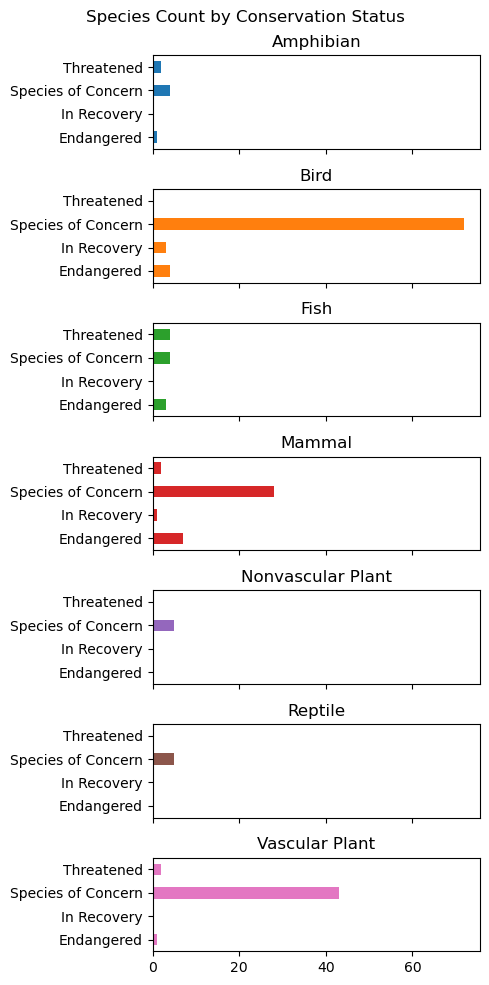

In [14]:
conservation_category.plot(
        kind='barh',
        subplots=True,
        title='Species Count by Conservation Status',
        xlabel= '',
        figsize=(5,10),
        legend=False
    )
plt.tight_layout()

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and including any species that had a value other than `Least Concern`. 

In [15]:
species['is_protected'] = species.conservation_status != 'Least Concern'

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [16]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers aren't always easy to visualize, so creating a `protection_ratio` column may be useful. From this analysis we see that ~17.0% of birds are protected and ~99.9% of vascular plants aren't protected.

In [17]:
category_counts['protection_ratio'] = category_counts.protected/ \
    (category_counts.protected + category_counts.not_protected)

category_counts

,category,not_protected,protected,protection_ratio
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


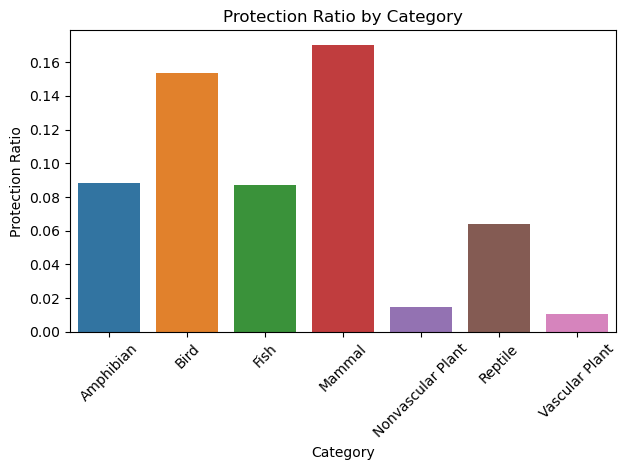

In [18]:
sns.barplot(x='category', y='protection_ratio', data=category_counts)
plt.title('Protection Ratio by Category')
plt.ylabel('Protection Ratio')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout();

### Statistical Significance
Next some chi-squared tests will be done to see if different species have a statistically significant difference in their conservation status ratio. A contingency table will be created like so.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|


<br></br>The first test, `contingency1` will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns a p-value of 0.69, and the expected contingency table below.

||protected|not protected|
|-|-|-|
|Mammal|28|148|
|Bird|77|411|

The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, 0.69 is much larger than 0.05. So, in the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables are independent. 

In [19]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146], [75, 413]]
chi2, p, dof, ex = chi2_contingency(contingency1)

print(f'p-value: {p}')
print(f'The expected frequencies: {ex}')

p-value: 0.6875948096661336
The expected frequencies: [[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


The next pair, is going to test the difference between `Reptile` and `Mammal`.

This time the p-value is 0.039, and the expected contingency table is below.

||protected|not protected|
|-|-|-|
|Mammal|24|152|
|Reptile|11|67|

Our p-value is below the standard threshold of 0.05, making the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [20]:
contingency2 = [[30, 146], [5, 73]]
chi2, p, dof, ex = chi2_contingency(contingency2)

print(f'p-value: {p}')
print(f'The expected frequencies: {ex}')

p-value: 0.03835559022969898
The expected frequencies: [[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


### Species in Parks
The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The current goal is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

Its best to first start cleaning the extra commas and parentheses in the `common_names` column.


In [21]:
temp_1 = species[species.category == 'Mammal']\
    .common_names\
    .apply(lambda x: x.replace(',',''))\
    .apply(lambda x: x.replace('(',''))\
    .apply(lambda x: x.replace(')',''))\
    .str\
    .split()

temp_1[:6]

0                         [Gapper's, Red-Backed, Vole]
1                             [American, Bison, Bison]
2    [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...
3    [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...
4                                    [Wapiti, Or, Elk]
5                                 [White-Tailed, Deer]
Name: common_names, dtype: object

The next step is to clean up duplicate words in each row since they should no be counted more than once per species. Using `[*set(x)]` is perfect for removing duplicate values in a list.

In [22]:
temp_2 = temp_1.apply(lambda x: [*set(x)])

temp_2[:6]

0                        [Gapper's, Red-Backed, Vole]
1                                   [Bison, American]
2    [Domesticated, Domestic, Aurochs, Feral, Cattle]
3              [Domestic, Sheep, Red, Mouflon, Feral]
4                                   [Elk, Or, Wapiti]
5                                [Deer, White-Tailed]
Name: common_names, dtype: object

Next the words will need to be collapsed into one column for easier use using `explode`.

In [23]:
temp_3 = temp_2.explode()

temp_3[:6]

0        Gapper's
0      Red-Backed
0            Vole
1           Bison
1        American
2    Domesticated
Name: common_names, dtype: object

Finally, the number occurrences of each word can be counted. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [24]:
temp_4 = pd.DataFrame(temp_3.value_counts().reset_index())
temp_4.columns = ['Word', 'Count']

temp_4.head(10)

,Word,Count
0,Bat,23
1,Shrew,18
2,Myotis,17
3,Mouse,16
4,Chipmunk,13
5,American,12
6,Squirrel,12
7,Vole,11
8,Eastern,11
9,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column `is_bat` will be made, checking if the `common_names` column contains the word "Bat".

In [25]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,False,False
1,Mammal,Bos bison,"American Bison, Bison",Least Concern,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern,False,False


Here is a subset of the data where `is_bat` is true, returning see the 23 rows that matched. There seems to be many species of bats with a mix of protected vs. non-protected status. 

In [26]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Least Concern,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Least Concern,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Least Concern,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Least Concern,False,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [27]:
bat_observations = sightings.merge(species[species.is_bat])

bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Least Concern,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [28]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [29]:
obs_by_park = pd.pivot_table(
                bat_observations,
                values='observations',
                index='park_name', 
                columns='is_protected',
                aggfunc=pd.Series.sum
        )\
        .rename_axis(None,axis=1)\
        .set_axis(['not_protected', 'protected'], axis=1)\
        .reset_index()

obs_by_park

,park_name,not_protected,protected
0,Bryce National Park,1596,1837
1,Great Smoky Mountains National Park,1299,1112
2,Yellowstone National Park,4044,4318
3,Yosemite National Park,2345,2441


But again, absolute numbers aren't always easy to visualize, so creating a `protection_ratio` column may be useful.

In [30]:
obs_by_park['protection_ratio'] = obs_by_park.protected/ \
    (obs_by_park.protected + obs_by_park.not_protected)

obs_by_park

,park_name,not_protected,protected,protection_ratio
0,Bryce National Park,1596,1837,0.535100
1,Great Smoky Mountains National Park,1299,1112,0.461219
2,Yellowstone National Park,4044,4318,0.516384
3,Yosemite National Park,2345,2441,0.510029


Below is a plot from the output of the last data manipulation. From this chart one can see that Yellowstone, Bryce National Parks, and Yosemite seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species, indicated by the dashed line. The Great Smoky Mountains National Park might need to beef up their efforts in conservation as they have seen more non-protected species.

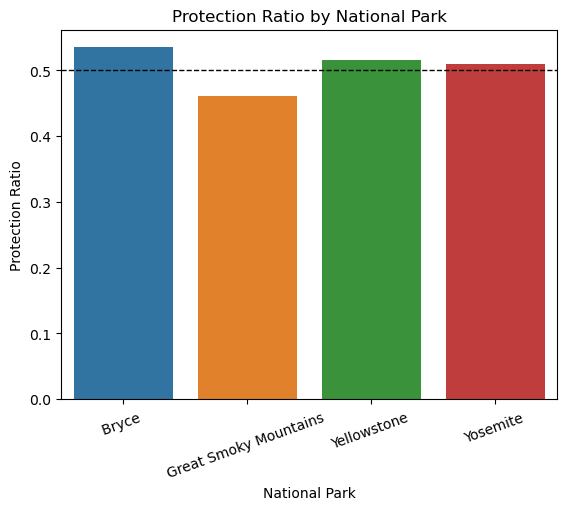

In [31]:
obs_by_park['park_name'] = obs_by_park.park_name.apply(lambda x: x.replace('National Park',''))

sns.barplot(data=obs_by_park, x='park_name', y='protection_ratio')
plt.title('Protection Ratio by National Park')
plt.ylabel('Protection Ratio')
plt.xlabel('National Park')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.xticks(rotation=20);

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation. (5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - The study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 